In [110]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [107]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
import matplotlib.pyplot as plt

In [6]:
from pathlib import Path
import os.path

In [7]:
from sklearn.model_selection import train_test_split

In [35]:
image_dir = Path("E:\APythonSoftware_2025\MP5\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data")

In [39]:
train_file_paths  = list(image_dir.glob(r'train/*/*.jpg'))
test_file_paths = list(image_dir.glob(r'test/*/*.jpg'))
val_file_paths = list(image_dir.glob(r'val/*/*.jpg'))

In [42]:
len(train_file_paths),len(test_file_paths),len(val_file_paths)

(6225, 3187, 1092)

In [43]:
train_file_paths

[WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/0055ESUKGS38.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/00H9IGEXR8N1.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/01KOCK58MEGR.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/02NB4GQNWVRW.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/04J91BOQEP2Q.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/05KGHV2JSURU.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/09HREQ5U6TO6.jpg'),
 WindowsPath('E:/APythonSoftware_2025/MP5/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish/0DSM1NY3WE0O.jpg'),


In [48]:
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file_paths))

In [49]:
train_file_paths = pd.Series(train_file_paths, name = "Filepath").astype(str)
train_labels = pd.Series(train_labels, name="Label")

In [50]:
train_df = pd.concat([train_file_paths,train_labels],axis=1)

In [51]:
train_df

,Filepath,Label
0,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,animal fish
1,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,animal fish
2,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,animal fish
3,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,animal fish
4,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,animal fish
...,...,...
6220,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,fish sea_food trout
6221,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,fish sea_food trout
6222,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,fish sea_food trout
6223,E:\APythonSoftware_2025\MP5\Dataset\images.cv_...,fish sea_food trout


In [ ]:
#Other method

In [98]:
train_dir = r"E:\APythonSoftware_2025\MP5\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
test_dir = r"E:\APythonSoftware_2025\MP5\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test"
val_dir = r"E:\APythonSoftware_2025\MP5\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

image_size = (256,256)
batch_size = 32
channels = 3
Epochs = 50

In [69]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 6225 files belonging to 11 classes.


In [70]:
len(train_dataset)

195

In [88]:
class_names = train_dataset.class_names
class_names

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']

In [ ]:
6225/32 #Total 6225 images are there, they are made into batches.
#Each batch has 32 images , so total 195 batches will be there

194.53125

In [72]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[10  0  3  3  9  4  0  9  2  9  3  3  4  8  0  4  0  8 10  0  2 10  2  3
  4  9  3 10  6  8  3  5]


In [ ]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch[0])  #the result is shown in tensor

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
for image_batch, label_batch in train_dataset.take(2):
    print(image_batch[0].numpy()) #Results in Array

[[[ 6.  0. 10.]
  [ 0.  0. 12.]
  [58. 77. 94.]
  ...
  [ 2.  1.  0.]
  [ 3.  0.  0.]
  [ 3.  0.  0.]]

 [[ 2.  0.  8.]
  [ 0.  0. 12.]
  [53. 76. 94.]
  ...
  [ 0.  0.  2.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  9.]
  [ 0.  3. 13.]
  [48. 75. 92.]
  ...
  [ 0.  0. 11.]
  [ 0.  1. 12.]
  [ 0.  1. 12.]]

 ...

 [[ 3.  0.  5.]
  [ 3.  0.  5.]
  [ 1.  0.  5.]
  ...
  [98. 78. 87.]
  [13.  1.  5.]
  [10.  1.  4.]]

 [[ 1.  0.  2.]
  [ 1.  0.  2.]
  [ 1.  0.  2.]
  ...
  [87. 68. 74.]
  [ 8.  0.  0.]
  [ 8.  0.  1.]]

 [[ 1.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  0.  0.]
  ...
  [84. 65. 71.]
  [12.  0.  2.]
  [ 8.  0.  1.]]]
[[[ 34.  39.  16.]
  [ 33.  38.  15.]
  [ 30.  38.  14.]
  ...
  [ 98. 121.  79.]
  [105. 126.  95.]
  [ 85. 108.  80.]]

 [[ 36.  41.  18.]
  [ 32.  40.  16.]
  [ 29.  37.  13.]
  ...
  [ 89. 107.  69.]
  [ 92. 112.  84.]
  [ 76.  99.  73.]]

 [[ 33.  41.  17.]
  [ 31.  39.  15.]
  [ 28.  36.  12.]
  ...
  [ 83.  97.  64.]
  [ 79.  97.  73.]
  [ 58.  79.  60.]]

 ...

In [86]:
for image_batch, label_batch in train_dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


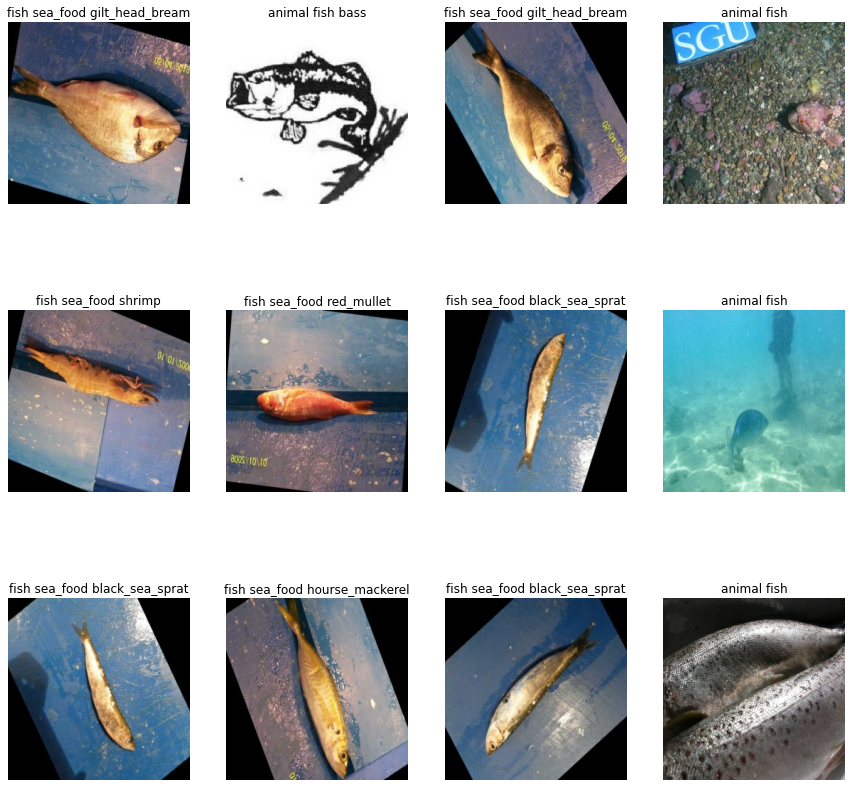

In [101]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #this is to convert the float into int
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [96]:
# Augmentation for training data
gen_train_img = ImageDataGenerator(
    rescale=1./255,           # Normalize to [0,1]
    rotation_range=20,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.2,    # Width shift
    height_shift_range=0.2,   # Height shift
    shear_range=0.15,         # Shear transform
    fill_mode='nearest'       # Filling in new pixels
)

In [99]:
# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = gen_train_img.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_size,
    shuffle = True,
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [109]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu", input_shape=(256,256,3))) #input

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer

model.add(Flatten()) #Converting the matrix values into single column

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.5)) #to control overfitting

model.add(Dense(train_generator.num_classes, activation="softmax")) #output 


c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
              )

In [114]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,521,187 (169.83 MB)

 Trainable params: 14,840,395 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,680,792 (113.22 MB)

In [ ]:
# # 7. Callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# # Train the Model
# history = model.fit(
#     train_generator,
#     epochs=12
#     ,
#     validation_data=val_generator,
#     callbacks=[early_stop, checkpoint]
# )

In [124]:
history = model.fit(train_generator,
          validation_data = val_test_datagen.flow_from_directory(
              val_dir,
              target_size = image_size,
              batch_size = batch_size,
              class_mode = 'categorical'
          ),
          epochs=12)

Found 1092 images belonging to 11 classes.
Epoch 1/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8599 - loss: 0.4058

c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.8599 - loss: 0.4058 - val_accuracy: 0.9332 - val_loss: 0.2119
Epoch 2/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.8563 - loss: 0.4018 - val_accuracy: 0.9332 - val_loss: 0.1990
Epoch 3/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.8717 - loss: 0.3598 - val_accuracy: 0.9441 - val_loss: 0.1939
Epoch 4/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8786 - loss: 0.3435 - val_accuracy: 0.9505 - val_loss: 0.1886
Epoch 5/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.8666 - loss: 0.3871 - val_accuracy: 0.9249 - val_loss: 0.2376
Epoch 6/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8618 - loss: 0.3922 - val_accuracy: 0.9487 - val_loss: 0.1725
Epoch 7/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.8967 - loss: 0.3187 - val_accuracy: 0.9478 - val_loss: 0.1739
Epoch 8/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8744 - loss: 0.3608 - val_accuracy: 0.958

In [125]:

# Model Accuracy
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.9725 - loss: 0.1173
Test accuracy: 97.49%


100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step


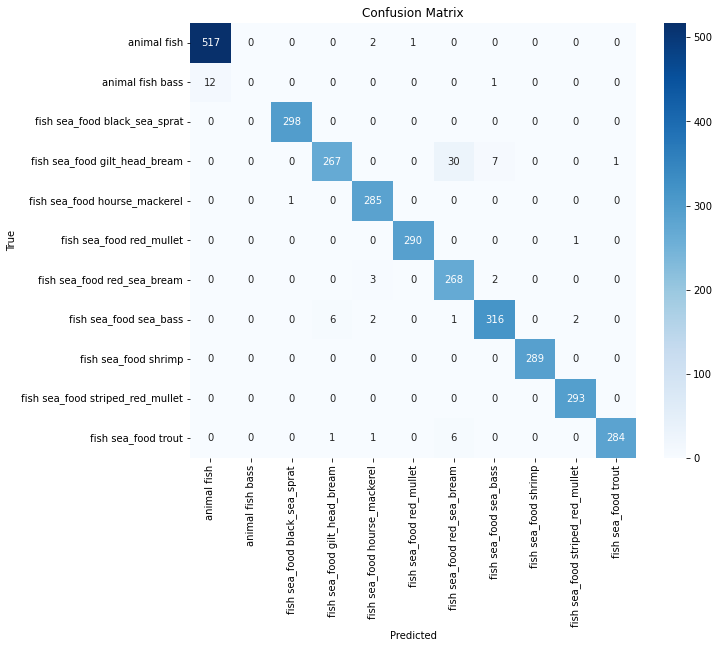

                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       0.97      0.88      0.92       305
   fish sea_food hourse_mackerel       0.97      1.00      0.98       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       0.88      0.98      0.93       273
          fish sea_food sea_bass       0.97      0.97      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish sea_food trout       1.00      0.97      0.98       292

                        accuracy                           0.97      3187
                       macro avg    

c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [126]:
#  Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

class_labels = list(train_generator.class_indices.keys())

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#  11. Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

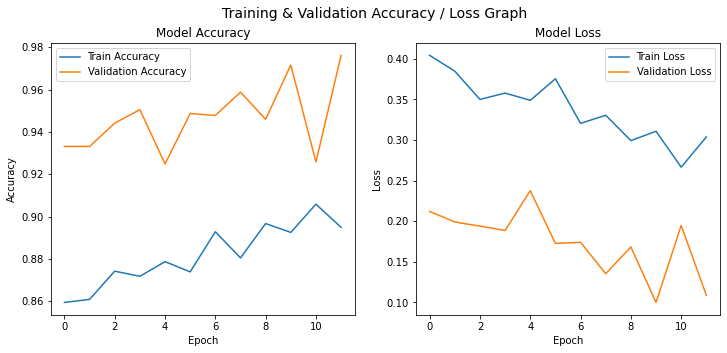

In [127]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

#  Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#  Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('Training & Validation Accuracy / Loss Graph', fontsize=14)
plt.show()

In [128]:
loss, accuracy = model.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.9790 - loss: 0.0983
Final Validation Accuracy: 97.62%


In [129]:
loss, accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9725 - loss: 0.1173
Final Test Accuracy: 97.49%


In [131]:
#making predictions on a single image.

from tensorflow.keras.preprocessing import image

import numpy as np

# Path to the new image for prediction
img_path = r"E:\62MW9Z31IX0Z.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match training size
img_array = image.img_to_array(img)                     # Convert to numpy array (H, W, C)
img_array = img_array / 255.0                           # Normalize to [0,1] like training
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension -> (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]      # Get index of highest probability

# Map index to class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: animal fish


In [132]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [133]:
# Load VGG16 base model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base layers

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)             #Bigger model, captures more patterns, better for complex datasets

x = Dropout(0.5)(x)                              #Dropout for regularization (avoids overfitting)

predictions = Dense(11, activation='softmax')(x)

# Final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('vgg16_best.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model (train_generator and val_generator should be defined before)
history = model_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint, early_stop]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1437 - loss: 2.4217

195/195 ━━━━━━━━━━━━━━━━━━━━ 731s 4s/step - accuracy: 0.1439 - loss: 2.4211 - val_accuracy: 0.3663 - val_loss: 2.0284
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2935 - loss: 2.0597

195/195 ━━━━━━━━━━━━━━━━━━━━ 666s 3s/step - accuracy: 0.2936 - loss: 2.0594 - val_accuracy: 0.5824 - val_loss: 1.8100
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3920 - loss: 1.8467

195/195 ━━━━━━━━━━━━━━━━━━━━ 711s 4s/step - accuracy: 0.3921 - loss: 1.8465 - val_accuracy: 0.6456 - val_loss: 1.6480
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4850 - loss: 1.7013

195/195 ━━━━━━━━━━━━━━━━━━━━ 711s 4s/step - accuracy: 0.4850 - loss: 1.7012 - val_accuracy: 0.6685 - val_loss: 1.5201
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5387 - loss: 1.5777

195/195 ━━━━━━━━━━━━━━━━━━━━ 708s 4s/step - accuracy: 0.5388 - loss: 1.5776 - val_accuracy: 0.7143 - val_loss: 1.3995


In [134]:
loss, accuracy = model_vgg16.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.7342 - loss: 1.3602
Final Validation Accuracy: 71.43%


In [135]:
loss, accuracy = model_vgg16.evaluate(test_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.8178 - loss: 1.0423
Final Validation Accuracy: 74.74%


35/35 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step


c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

                                  precision    recall  f1-score   support

                     animal fish       0.16      0.18      0.17       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.09      0.12      0.11       105
   fish sea_food gilt_head_bream       0.11      0.04      0.06        94
   fish sea_food hourse_mackerel       0.08      0.10      0.09        97
        fish sea_food red_mullet       0.05      0.04      0.05        90
     fish sea_food red_sea_bream       0.08      0.07      0.07       113
          fish sea_food sea_bass       0.07      0.05      0.06        97
            fish sea_food shrimp       0.07      0.09      0.08       100
fish sea_food striped_red_mullet       0.12      0.09      0.10       101
             fish sea_food trout       0.11      0.14      0.13        98

                        accuracy                           0.10      1092
                       macro avg    

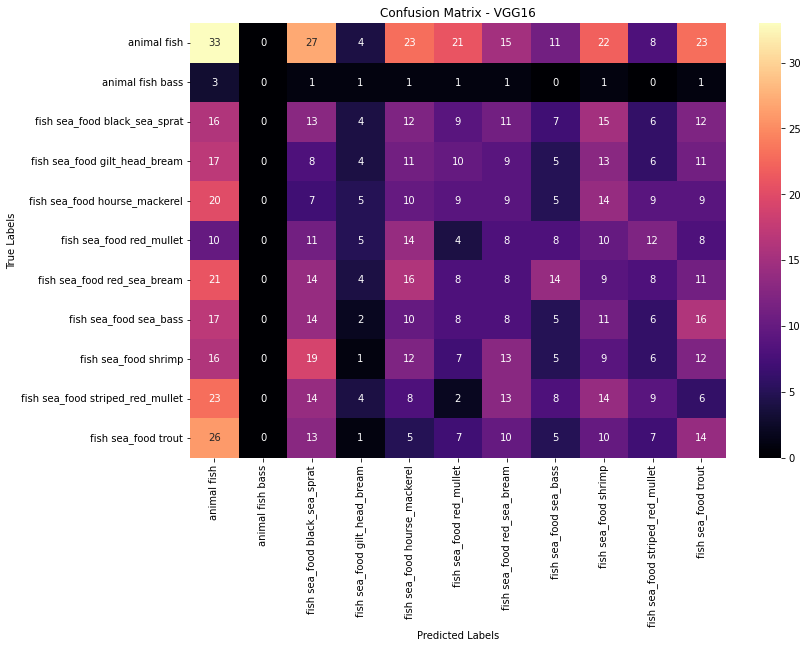

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

#  Predict
y_pred_probs = model_vgg16.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes

#  Class Labels
class_labels = list(val_generator.class_indices.keys())

#  Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix with seaborn
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#dark color model got confuse and it predicted correctly 43 class light color 

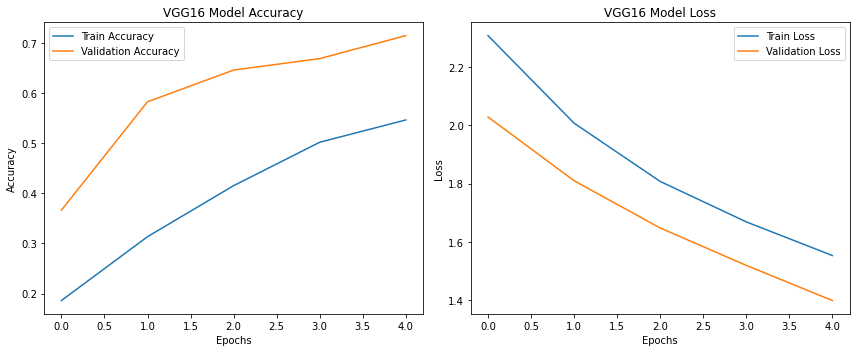

In [137]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [140]:
# Load ResNet50 base model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_model.trainable = False  # Freeze base layers

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11, activation='softmax')(x)

# Final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


checkpoint = ModelCheckpoint('resnet50_best.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

# Train the model (train_generator and val_generator should be defined before)
history_resnet50 = model_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, early_stop]
)

loss, accuracy = model_resnet50.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_resnet50.evaluate(test_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1268 - loss: 2.5579

195/195 ━━━━━━━━━━━━━━━━━━━━ 578s 3s/step - accuracy: 0.1269 - loss: 2.5572 - val_accuracy: 0.1712 - val_loss: 2.2660
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.1775 - loss: 2.2765 - val_accuracy: 0.1712 - val_loss: 2.2354
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.1845 - loss: 2.2504 - val_accuracy: 0.1658 - val_loss: 2.2128
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1897 - loss: 2.2354

195/195 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.1896 - loss: 2.2353 - val_accuracy: 0.2042 - val_loss: 2.1905
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.1933 - loss: 2.2195 - val_accuracy: 0.1685 - val_loss: 2.1656
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1995 - loss: 2.1910

195/195 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.1995 - loss: 2.1910 - val_accuracy: 0.2225 - val_loss: 2.1451
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.2110 - loss: 2.1677 - val_accuracy: 0.1905 - val_loss: 2.1310
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2084 - loss: 2.1605

195/195 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.2084 - loss: 2.1605 - val_accuracy: 0.2399 - val_loss: 2.1108
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.2247 - loss: 2.1556 - val_accuracy: 0.2280 - val_loss: 2.1019
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.2274 - loss: 2.1348 - val_accuracy: 0.2299 - val_loss: 2.0762
35/35 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.2280 - loss: 2.1118
Final Validation Accuracy: 23.99%
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.4084 - loss: 1.8786
Final Validation Accuracy: 22.69%


100/100 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step


c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

                                  precision    recall  f1-score   support

                     animal fish       0.21      0.81      0.34       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.15      0.04      0.06       305
   fish sea_food hourse_mackerel       0.32      0.16      0.22       286
        fish sea_food red_mullet       0.27      0.30      0.28       291
     fish sea_food red_sea_bream       0.61      0.06      0.11       273
          fish sea_food sea_bass       0.23      0.08      0.12       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.22      0.21      0.21       293
             fish sea_food trout       0.22      0.18      0.20       292

                        accuracy                           0.23      3187
                       macro avg    

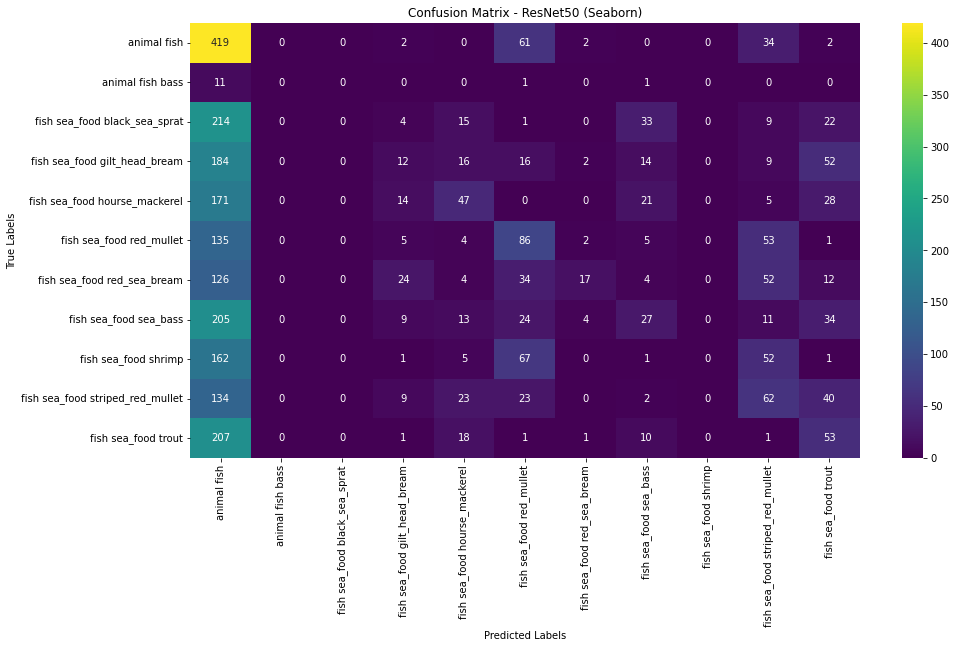

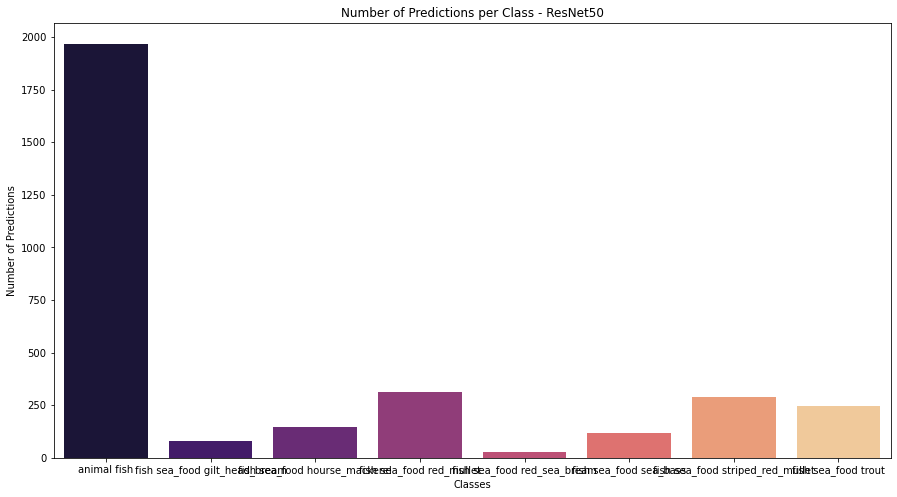

In [142]:
# ✅ Predictions
y_pred_probs = model_resnet50.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# ✅ Class labels
class_labels = list(test_generator.class_indices.keys())

# ✅ Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ✅ Confusion Matrix - Heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - ResNet50 (Seaborn)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ✅ Bar Plot of Predictions per Class
unique, counts = np.unique(y_pred, return_counts=True)
pred_counts = dict(zip(unique, counts))

plt.figure(figsize=(15, 8))
sns.barplot(x=[class_labels[i] for i in pred_counts.keys()], 
            y=list(pred_counts.values()), palette='magma')
plt.title("Number of Predictions per Class - ResNet50")
plt.xlabel("Classes")
plt.ylabel("Number of Predictions")
plt.show()

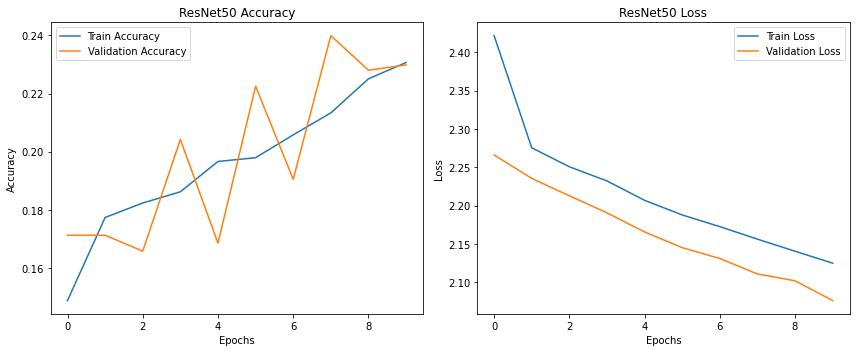

In [143]:
# Plot accuracy and loss graphs for ResNet50
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [149]:
# Load pre-trained MobileNet model without top
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_mobile.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(11, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                      metrics=['accuracy'])

checkpoint_mobile = ModelCheckpoint("best_mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)

C:\Users\91887\AppData\Local\Temp/ipykernel_21964/1573809895.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7312 - loss: 0.9259

195/195 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.7320 - loss: 0.9234 - val_accuracy: 0.9789 - val_loss: 0.0949
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9853 - loss: 0.0747

195/195 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9853 - loss: 0.0746 - val_accuracy: 0.9954 - val_loss: 0.0297
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.9911 - loss: 0.0427 - val_accuracy: 0.9908 - val_loss: 0.0384
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9924 - loss: 0.0310 - val_accuracy: 0.9954 - val_loss: 0.0170
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.9931 - loss: 0.0261 - val_accuracy: 0.9954 - val_loss: 0.0146


In [150]:
loss, accuracy = model_mobile.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_mobile.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 868ms/step - accuracy: 0.9950 - loss: 0.0271
Final Validation Accuracy: 99.54%
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9903 - loss: 0.0329
Final Test Accuracy: 99.34%


100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 949ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.99      0.98      0.99       520
                animal fish bass       0.91      0.77      0.83        13
   fish sea_food black_sea_sprat       0.99      1.00      1.00       298
   fish sea_food gilt_head_bream       0.98      1.00      0.99       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       0.99      1.00      0.99       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      0.99      0.99       293
             fish sea_food trout       1.00      0.99      0.99       292

                        accuracy                           0.99   

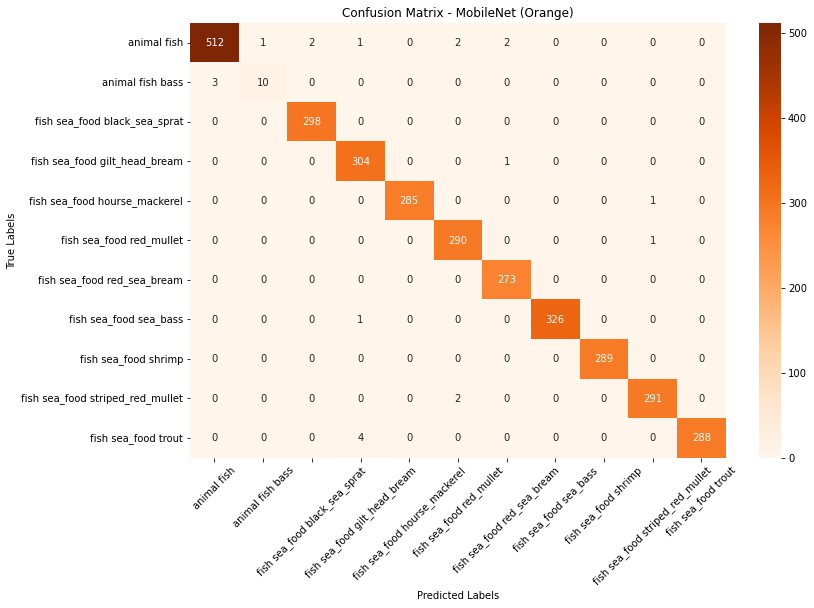

In [151]:
# Predictions for MobileNet
y_pred_probs_mobilenet = model_mobile.predict(test_generator)
y_pred_mobilenet = np.argmax(y_pred_probs_mobilenet, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# ✅ Classification Report (printed)
report = classification_report(y_true, y_pred_mobilenet, target_names=class_labels, output_dict=True)
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

# ✅ Confusion Matrix Heatmap with ORANGE color
cm = confusion_matrix(y_true, y_pred_mobilenet)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MobileNet (Orange)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

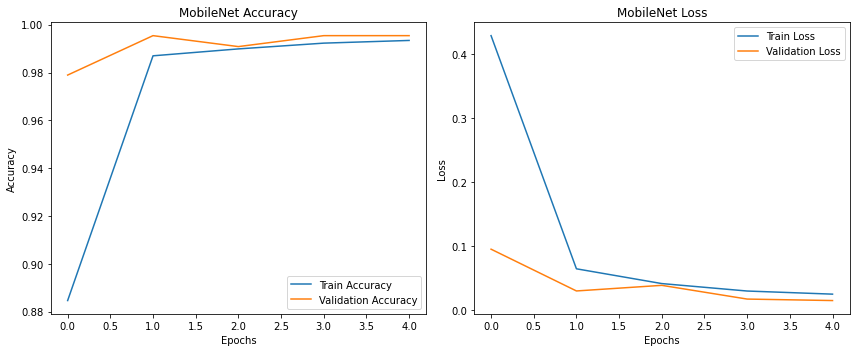

In [152]:
# Plot accuracy and loss graphs for MobileNet
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [153]:
# --- Step 2: Train InceptionV3 Model ---
# Load base InceptionV3 without top layers, pre-trained on ImageNet
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_inception.trainable = False  # Freeze convolution layers to avoid overfitting

# Add new custom classification head
x = base_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(11, activation='softmax')(x)

model_inception = Model(inputs=base_inception.input, outputs=output)
model_inception.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Save the best model only & stop early if no improvement
checkpoint_inception = ModelCheckpoint('inception_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history_inception = model_inception.fit(train_generator, validation_data=val_generator, epochs=5,
                                        callbacks=[checkpoint_inception, early_stop_inception])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 44s 1us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3743 - loss: 1.9302

195/195 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.3753 - loss: 1.9276 - val_accuracy: 0.8736 - val_loss: 0.6497
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7796 - loss: 0.7364

195/195 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.7798 - loss: 0.7360 - val_accuracy: 0.9231 - val_loss: 0.3730
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8452 - loss: 0.5250

195/195 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8453 - loss: 0.5247 - val_accuracy: 0.9350 - val_loss: 0.2787
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.8885 - loss: 0.3774 - val_accuracy: 0.9350 - val_loss: 0.2371
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9014 - loss: 0.3208

195/195 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9015 - loss: 0.3208 - val_accuracy: 0.9515 - val_loss: 0.1976


In [154]:
loss, accuracy = model_inception.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_inception.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9618 - loss: 0.1712
Final Validation Accuracy: 95.15%
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9644 - loss: 0.1517
Final Test Accuracy: 95.98%


100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step
===== Classification Report: InceptionV3 =====
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.98      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      0.94      0.96       298
   fish sea_food gilt_head_bream       0.94      0.97      0.95       305
   fish sea_food hourse_mackerel       0.93      0.99      0.96       286
        fish sea_food red_mullet       0.95      0.95      0.95       291
     fish sea_food red_sea_bream       0.99      0.99      0.99       273
          fish sea_food sea_bass       0.92      0.97      0.94       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.94      0.87      0.91       293
             fish sea_food trout       0.98      0.97      0.98       292

                     

c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

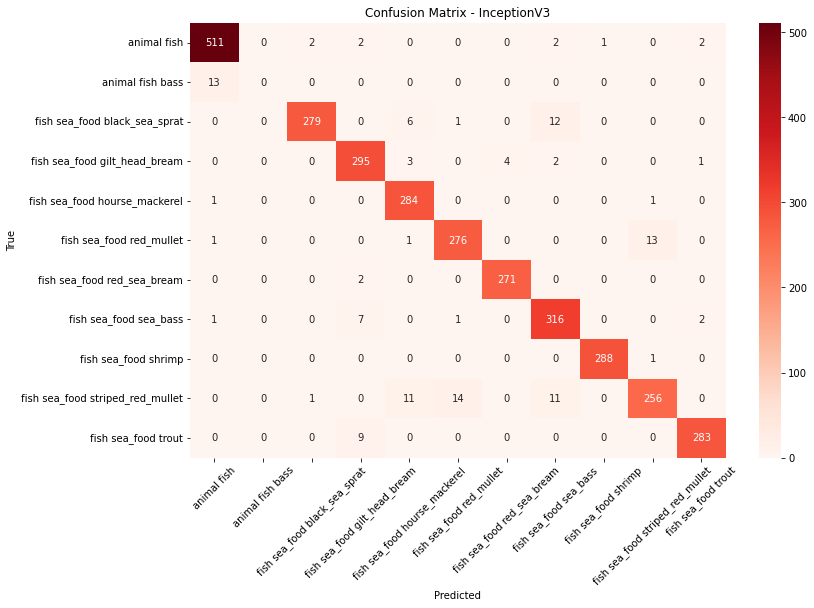

In [155]:
# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Predictions for  models
y_pred_inception = np.argmax(model_inception.predict(test_generator), axis=1)


# Print detailed metrics
print("===== Classification Report: InceptionV3 =====")
print(classification_report(y_true, y_pred_inception, target_names=class_labels))



# --- Step 5: Confusion Matrix Plot with seaborn (clear, color-coded) ---
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                 xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.show()

# Generate confusion matrices
cm_inception = confusion_matrix(y_true, y_pred_inception)


plot_confusion_matrix(cm_inception, class_labels, "Confusion Matrix - InceptionV3")

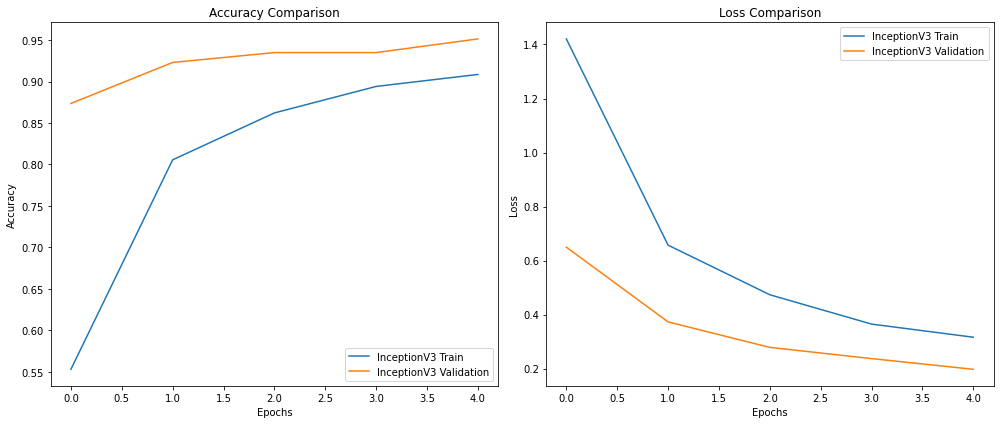

In [156]:
plt.figure(figsize=(14,6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_accuracy'], label='InceptionV3 Validation')

plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_loss'], label='InceptionV3 Validation')

plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [157]:
# EfficientNetB0 base
base_efficient = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256, 3))
base_efficient.trainable = False

# Custom top layers
x = base_efficient.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)

model_efficient = Model(inputs=base_efficient.input, outputs=output)

model_efficient.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_efficient = ModelCheckpoint('efficient_best.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_efficient = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_efficient = model_efficient.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint_efficient, early_stop_efficient]
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1461 - loss: 2.3474

195/195 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.1462 - loss: 2.3474 - val_accuracy: 0.1712 - val_loss: 2.3128
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.1759 - loss: 2.3245 - val_accuracy: 0.1712 - val_loss: 2.3107
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.1715 - loss: 2.3144 - val_accuracy: 0.1712 - val_loss: 2.3125
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.1788 - loss: 2.3099 - val_accuracy: 0.1712 - val_loss: 2.3115


In [158]:
loss, accuracy = model_efficient.evaluate(val_generator)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

loss, accuracy = model_efficient.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1640 - loss: 2.3110
Final Validation Accuracy: 17.12%
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4507 - loss: 2.1043
Final Test Accuracy: 16.32%


100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step
===== Classification Report: EfficientNetB0 =====
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                  

c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

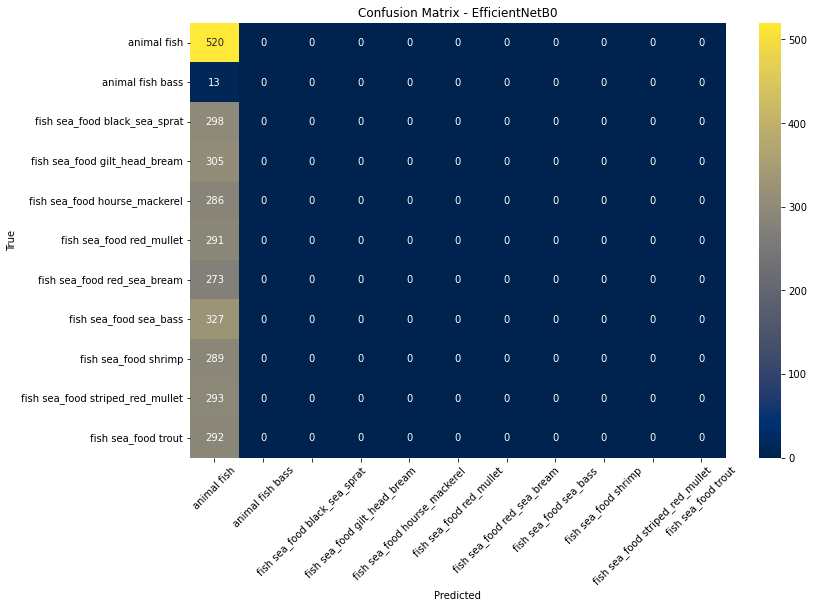

In [159]:
# True labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Predictions for both models

y_pred_efficient = np.argmax(model_efficient.predict(test_generator), axis=1)

# Print detailed metrics

print("===== Classification Report: EfficientNetB0 =====")
print(classification_report(y_true, y_pred_efficient, target_names=class_labels))


# --- Step 5: Confusion Matrix Plot with seaborn (clear, color-coded) ---
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.show()

# Generate confusion matrices

cm_efficient = confusion_matrix(y_true, y_pred_efficient)

plot_confusion_matrix(cm_efficient, class_labels, "Confusion Matrix - EfficientNetB0")

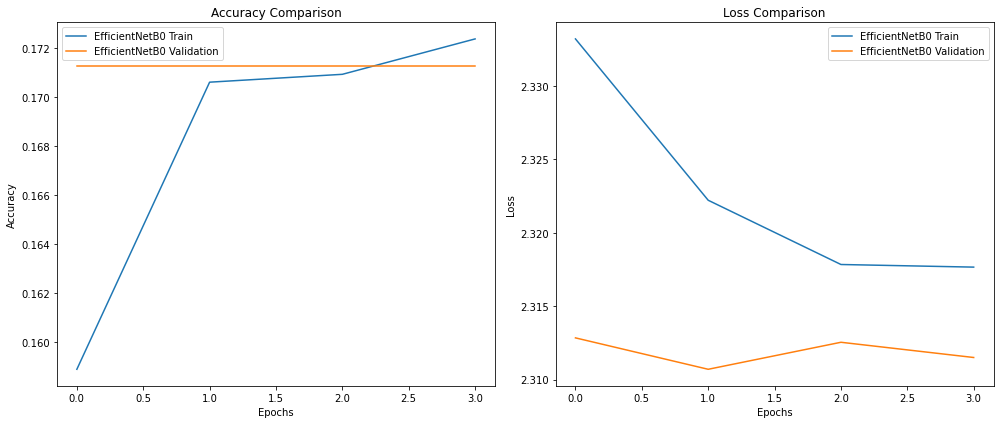

In [160]:
# --- Step 6: Training History Visualization (Accuracy & Loss) ---
plt.figure(figsize=(14,6))

# Plot Accuracy
plt.subplot(1, 2, 1)

plt.plot(history_efficient.history['accuracy'], label='EfficientNetB0 Train')
plt.plot(history_efficient.history['val_accuracy'], label='EfficientNetB0 Validation')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)

plt.plot(history_efficient.history['loss'], label='EfficientNetB0 Train')
plt.plot(history_efficient.history['val_loss'], label='EfficientNetB0 Validation')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

===== EfficientNetB0 Evaluation Metrics (DataFrame) =====
                                  precision    recall  f1-score      support
animal fish                        0.163163  1.000000  0.280550   520.000000
animal fish bass                   0.000000  0.000000  0.000000    13.000000
fish sea_food black_sea_sprat      0.000000  0.000000  0.000000   298.000000
fish sea_food gilt_head_bream      0.000000  0.000000  0.000000   305.000000
fish sea_food hourse_mackerel      0.000000  0.000000  0.000000   286.000000
fish sea_food red_mullet           0.000000  0.000000  0.000000   291.000000
fish sea_food red_sea_bream        0.000000  0.000000  0.000000   273.000000
fish sea_food sea_bass             0.000000  0.000000  0.000000   327.000000
fish sea_food shrimp               0.000000  0.000000  0.000000   289.000000
fish sea_food striped_red_mullet   0.000000  0.000000  0.000000   293.000000
fish sea_food trout                0.000000  0.000000  0.000000   292.000000
accuracy          

c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91887\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

<Figure size 3240x2160 with 0 Axes>

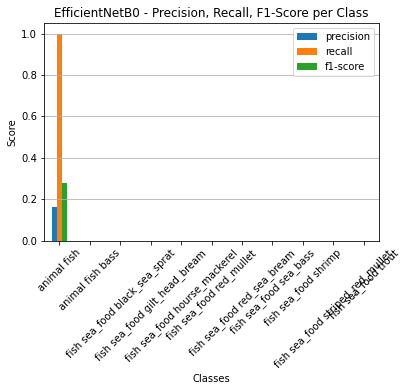

In [165]:
# --- Step 7: Evaluation Metrics for EfficientNetB0 ---
report_efficient = classification_report(y_true, y_pred_efficient, target_names=class_labels, output_dict=True)

import pandas as pd
report_df = pd.DataFrame(report_efficient).transpose()

print("===== EfficientNetB0 Evaluation Metrics (DataFrame) =====")
print(report_df)

# Visualize precision, recall, f1-score as barplot
plt.figure(figsize=(45, 30))
report_df.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("EfficientNetB0 - Precision, Recall, F1-Score per Class")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()